In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [16]:
usmap = gpd.read_file('states.shp') 

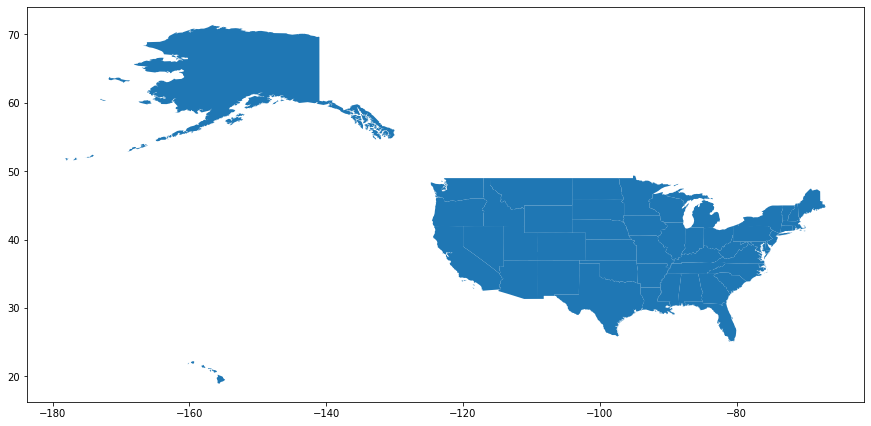

In [17]:
fig,ax = plt.subplots(figsize = (15,15))
usmap.plot(ax=ax)

# BAYER patient locations

In [18]:
bayer = pd.read_csv('BRCA1_BRCA2_ATM.csv')
crs = {'init':'epsg:4236'}
bayer.head()

,case_id1,gender,vital_status,year_of_birth,ajcc_pathologic_stage,primary_diagnosis,treatment_type,year_of_diagnosis,Location,latitude,longitude,city,state,zip
0,bb026999-0aab-4232-96d7-2c93b6c9691d,female,Alive,1963.0,Stage IIIA,Mucinous adenocarcinoma,"Pharmaceutical Therapy, NOS",2010.0,O’Neal Comprehensive Cancer Center,34.140800,-85.655930,Birmingham,Alabama,35294.0
1,a32cb96a-78bf-456e-a6ab-2d47b2c67ad4,female,Alive,1951.0,Stage IIA,"Infiltrating duct carcinoma, NOS","Pharmaceutical Therapy, NOS",2007.0,University of Arizona Cancer Center,32.240670,-110.944090,Tucson,Arizona,85724.0
2,97943d87-fed7-4f14-a0a7-c5bfee64c392,female,Alive,1955.0,Stage IIB,"Infiltrating duct carcinoma, NOS","Pharmaceutical Therapy, NOS",2010.0,Stanford Cancer Institute (SCI),37.437250,-122.177270,Palo Alto,California,94305.0
3,bdd08ec8-8892-4273-8f21-6fde0f23c52d,female,Alive,1937.0,Stage IIA,"Lobular carcinoma, NOS","Pharmaceutical Therapy, NOS",2012.0,City of Hope Comprehensive Cancer Center,34.132229,-117.971619,Duarte,California,91010.0
4,20e8106b-1290-4735-abe4-7621e08e3dc8,female,Alive,1971.0,Stage IIIC,"Infiltrating duct carcinoma, NOS","Radiation Therapy, NOS",2009.0,UC Davis Comprehensive Cancer Center,38.555320,-121.452790,Sacramento,California,95817.0


In [19]:
geometry = [Point(xy) for xy in zip(bayer["longitude"],bayer["latitude"])]
geometry[:3]

In [21]:
geo_df = gpd.GeoDataFrame(bayer,crs=crs,geometry=geometry)
geo_df.head()

/Users/sarahayden/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,case_id1,gender,vital_status,year_of_birth,ajcc_pathologic_stage,primary_diagnosis,treatment_type,year_of_diagnosis,Location,latitude,longitude,city,state,zip,geometry
0,bb026999-0aab-4232-96d7-2c93b6c9691d,female,Alive,1963.0,Stage IIIA,Mucinous adenocarcinoma,"Pharmaceutical Therapy, NOS",2010.0,O’Neal Comprehensive Cancer Center,34.140800,-85.655930,Birmingham,Alabama,35294.0,POINT (-85.65593 34.14080)
1,a32cb96a-78bf-456e-a6ab-2d47b2c67ad4,female,Alive,1951.0,Stage IIA,"Infiltrating duct carcinoma, NOS","Pharmaceutical Therapy, NOS",2007.0,University of Arizona Cancer Center,32.240670,-110.944090,Tucson,Arizona,85724.0,POINT (-110.94409 32.24067)
2,97943d87-fed7-4f14-a0a7-c5bfee64c392,female,Alive,1955.0,Stage IIB,"Infiltrating duct carcinoma, NOS","Pharmaceutical Therapy, NOS",2010.0,Stanford Cancer Institute (SCI),37.437250,-122.177270,Palo Alto,California,94305.0,POINT (-122.17727 37.43725)
3,bdd08ec8-8892-4273-8f21-6fde0f23c52d,female,Alive,1937.0,Stage IIA,"Lobular carcinoma, NOS","Pharmaceutical Therapy, NOS",2012.0,City of Hope Comprehensive Cancer Center,34.132229,-117.971619,Duarte,California,91010.0,POINT (-117.97162 34.13223)
4,20e8106b-1290-4735-abe4-7621e08e3dc8,female,Alive,1971.0,Stage IIIC,"Infiltrating duct carcinoma, NOS","Radiation Therapy, NOS",2009.0,UC Davis Comprehensive Cancer Center,38.555320,-121.452790,Sacramento,California,95817.0,POINT (-121.45279 38.55532)


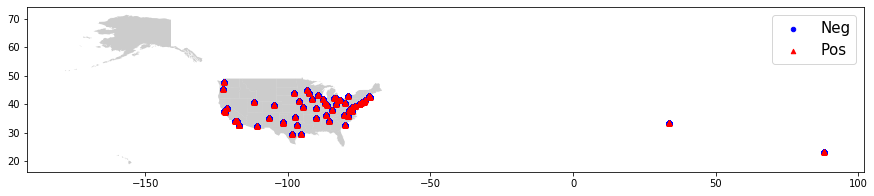

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
usmap.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax,markersize =20,color="blue",marker="o",label="Neg")
geo_df.plot(ax=ax,markersize =20,color="red",marker="^",label="Pos")
plt.legend(prop={'size':15})

# Incyte patient locations


In [35]:
incyte = pd.read_csv('FGFR.csv')
crs = {'init':'epsg:4236'}
incyte.head()

,case_id,gender,vital_status,year_of_birth,primary_diagnosis,treatment_type,Location,latitude,longitude,city,state,zip
0,3a3fc890-1985-4353-861b-dc3abfb364b1,female,Alive,1987.0,Glioblastoma,"Pharmaceutical Therapy, NOS",O’Neal Comprehensive Cancer Center,34.140800,-85.655930,Birmingham,Alabama,35294.0
1,05944575-8473-4ed0-9de8-8091018001c2,male,Alive,1977.0,Glioblastoma,"Radiation Therapy, NOS",University of Arizona Cancer Center,32.240670,-110.944090,Tucson,Arizona,85724.0
2,521ea765-1bd1-423d-a75d-091243df37a9,male,Alive,1956.0,Glioblastoma,"Radiation Therapy, NOS",Stanford Cancer Institute (SCI),37.437250,-122.177270,Palo Alto,California,94305.0
3,68f6976e-d3f2-432d-a121-274e228735b0,female,Alive,1967.0,Glioblastoma,"Radiation Therapy, NOS",City of Hope Comprehensive Cancer Center,34.132229,-117.971619,Duarte,California,91010.0
4,47a4161c-9c61-48f5-b9bc-a6d1acad4e5a,male,Alive,1952.0,Glioblastoma,"Pharmaceutical Therapy, NOS",UC Davis Comprehensive Cancer Center,38.555320,-121.452790,Sacramento,California,95817.0


In [36]:
geometry = [Point(xy) for xy in zip(incyte["longitude"],incyte["latitude"])]
geometry[:3]

In [37]:
geo_df1 = gpd.GeoDataFrame(incyte,crs=crs,geometry=geometry)
geo_df1.head()

/Users/sarahayden/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,case_id,gender,vital_status,year_of_birth,primary_diagnosis,treatment_type,Location,latitude,longitude,city,state,zip,geometry
0,3a3fc890-1985-4353-861b-dc3abfb364b1,female,Alive,1987.0,Glioblastoma,"Pharmaceutical Therapy, NOS",O’Neal Comprehensive Cancer Center,34.140800,-85.655930,Birmingham,Alabama,35294.0,POINT (-85.65593 34.14080)
1,05944575-8473-4ed0-9de8-8091018001c2,male,Alive,1977.0,Glioblastoma,"Radiation Therapy, NOS",University of Arizona Cancer Center,32.240670,-110.944090,Tucson,Arizona,85724.0,POINT (-110.94409 32.24067)
2,521ea765-1bd1-423d-a75d-091243df37a9,male,Alive,1956.0,Glioblastoma,"Radiation Therapy, NOS",Stanford Cancer Institute (SCI),37.437250,-122.177270,Palo Alto,California,94305.0,POINT (-122.17727 37.43725)
3,68f6976e-d3f2-432d-a121-274e228735b0,female,Alive,1967.0,Glioblastoma,"Radiation Therapy, NOS",City of Hope Comprehensive Cancer Center,34.132229,-117.971619,Duarte,California,91010.0,POINT (-117.97162 34.13223)
4,47a4161c-9c61-48f5-b9bc-a6d1acad4e5a,male,Alive,1952.0,Glioblastoma,"Pharmaceutical Therapy, NOS",UC Davis Comprehensive Cancer Center,38.555320,-121.452790,Sacramento,California,95817.0,POINT (-121.45279 38.55532)


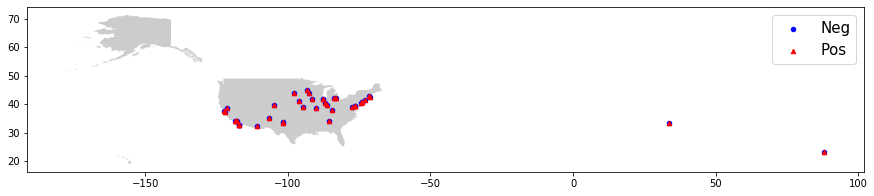

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
usmap.plot(ax=ax,alpha=0.4,color="grey")
geo_df1.plot(ax=ax,markersize =20,color="blue",marker="o",label="Neg")
geo_df1.plot(ax=ax,markersize =20,color="red",marker="^",label="Pos")
plt.legend(prop={'size':15})

# Janssen patient locations

In [31]:
janssen = pd.read_csv('FGFR.csv')
crs = {'init':'epsg:4236'}
janssen.head()

,case_id,gender,vital_status,year_of_birth,primary_diagnosis,treatment_type,Location,latitude,longitude,city,state,zip
0,3a3fc890-1985-4353-861b-dc3abfb364b1,female,Alive,1987.0,Glioblastoma,"Pharmaceutical Therapy, NOS",O’Neal Comprehensive Cancer Center,34.140800,-85.655930,Birmingham,Alabama,35294.0
1,05944575-8473-4ed0-9de8-8091018001c2,male,Alive,1977.0,Glioblastoma,"Radiation Therapy, NOS",University of Arizona Cancer Center,32.240670,-110.944090,Tucson,Arizona,85724.0
2,521ea765-1bd1-423d-a75d-091243df37a9,male,Alive,1956.0,Glioblastoma,"Radiation Therapy, NOS",Stanford Cancer Institute (SCI),37.437250,-122.177270,Palo Alto,California,94305.0
3,68f6976e-d3f2-432d-a121-274e228735b0,female,Alive,1967.0,Glioblastoma,"Radiation Therapy, NOS",City of Hope Comprehensive Cancer Center,34.132229,-117.971619,Duarte,California,91010.0
4,47a4161c-9c61-48f5-b9bc-a6d1acad4e5a,male,Alive,1952.0,Glioblastoma,"Pharmaceutical Therapy, NOS",UC Davis Comprehensive Cancer Center,38.555320,-121.452790,Sacramento,California,95817.0


In [32]:
geometry = [Point(xy) for xy in zip(janssen["longitude"],janssen["latitude"])]
geometry[:3]

In [33]:
geo_df2 = gpd.GeoDataFrame(janssen,crs=crs,geometry=geometry)
geo_df2.head()

/Users/sarahayden/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,case_id,gender,vital_status,year_of_birth,primary_diagnosis,treatment_type,Location,latitude,longitude,city,state,zip,geometry
0,3a3fc890-1985-4353-861b-dc3abfb364b1,female,Alive,1987.0,Glioblastoma,"Pharmaceutical Therapy, NOS",O’Neal Comprehensive Cancer Center,34.140800,-85.655930,Birmingham,Alabama,35294.0,POINT (-85.65593 34.14080)
1,05944575-8473-4ed0-9de8-8091018001c2,male,Alive,1977.0,Glioblastoma,"Radiation Therapy, NOS",University of Arizona Cancer Center,32.240670,-110.944090,Tucson,Arizona,85724.0,POINT (-110.94409 32.24067)
2,521ea765-1bd1-423d-a75d-091243df37a9,male,Alive,1956.0,Glioblastoma,"Radiation Therapy, NOS",Stanford Cancer Institute (SCI),37.437250,-122.177270,Palo Alto,California,94305.0,POINT (-122.17727 37.43725)
3,68f6976e-d3f2-432d-a121-274e228735b0,female,Alive,1967.0,Glioblastoma,"Radiation Therapy, NOS",City of Hope Comprehensive Cancer Center,34.132229,-117.971619,Duarte,California,91010.0,POINT (-117.97162 34.13223)
4,47a4161c-9c61-48f5-b9bc-a6d1acad4e5a,male,Alive,1952.0,Glioblastoma,"Pharmaceutical Therapy, NOS",UC Davis Comprehensive Cancer Center,38.555320,-121.452790,Sacramento,California,95817.0,POINT (-121.45279 38.55532)


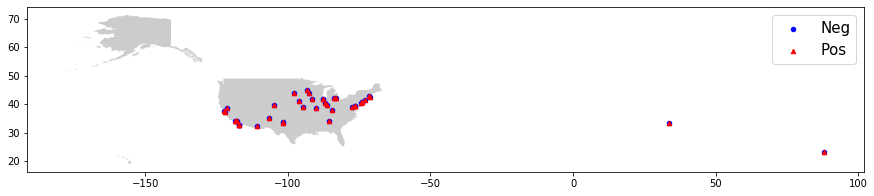

In [34]:
fig, ax = plt.subplots(figsize=(15,15))
usmap.plot(ax=ax,alpha=0.4,color="grey")
geo_df2.plot(ax=ax,markersize =20,color="blue",marker="o",label="Neg")
geo_df2.plot(ax=ax,markersize =20,color="red",marker="^",label="Pos")
plt.legend(prop={'size':15})

# Bayer Trial Locations

In [39]:
bayer2 = pd.read_csv('bayer_trial_locations.csv')
crs = {'init':'epsg:4236'}
bayer2.head()

,Account,Zip,Lat,Long
0,H. Lee Moffitt Cancer Center & Research Institute,33612,28.064067,-82.421726
1,Emory University,30322,33.791980,-84.350120
2,Massachusetts General Hospital,2114,42.362400,-71.069750
3,Dana-Farber Cancer Institute,2215,42.348960,-71.098030
4,Weill Cornell Medical College,10021,40.713051,-74.007233


In [40]:
geometry = [Point(xy) for xy in zip(bayer2["Long"],bayer2["Lat"])]
geometry[:3]

In [41]:
geo_df_b2 = gpd.GeoDataFrame(bayer2,crs=crs,geometry=geometry)
geo_df_b2.head()

/Users/sarahayden/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Account,Zip,Lat,Long,geometry
0,H. Lee Moffitt Cancer Center & Research Institute,33612,28.064067,-82.421726,POINT (-82.42173 28.06407)
1,Emory University,30322,33.791980,-84.350120,POINT (-84.35012 33.79198)
2,Massachusetts General Hospital,2114,42.362400,-71.069750,POINT (-71.06975 42.36240)
3,Dana-Farber Cancer Institute,2215,42.348960,-71.098030,POINT (-71.09803 42.34896)
4,Weill Cornell Medical College,10021,40.713051,-74.007233,POINT (-74.00723 40.71305)


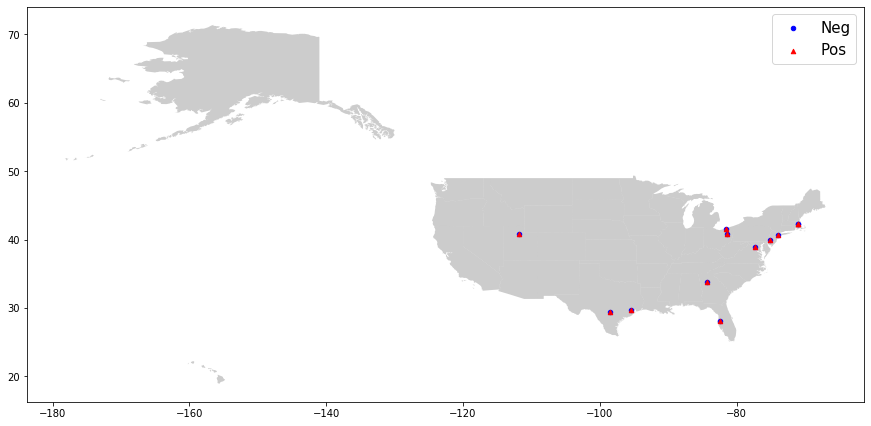

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
usmap.plot(ax=ax,alpha=0.4,color="grey")
geo_df_b2.plot(ax=ax,markersize =20,color="blue",marker="o",label="Neg")
geo_df_b2.plot(ax=ax,markersize =20,color="red",marker="^",label="Pos")
plt.legend(prop={'size':15})

# Incyte Trial Locations

In [45]:
incyte2 = pd.read_csv('incyte_trial_sites.csv')
crs = {'init':'epsg:4236'}
incyte2.head()

,Account,Zip,Lat,Long
0,Compassionate Cancer Care Medical Group,92708,33.71093,-117.95069
1,Ocala Oncology Center,34474,29.15538,-82.19709
2,Hawaii Cancer Care,96813,21.30861,-157.85484
3,Illinois Cancer Care,61615,40.76282,-89.65057
4,FMH James M Stockman Cancer Institute,21702,39.43173,-77.47388


In [46]:
geometry = [Point(xy) for xy in zip(incyte2["Long"],incyte2["Lat"])]
geometry[:3]

In [47]:
geo_df_i2 = gpd.GeoDataFrame(incyte2,crs=crs,geometry=geometry)
geo_df_i2.head()

/Users/sarahayden/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Account,Zip,Lat,Long,geometry
0,Compassionate Cancer Care Medical Group,92708,33.71093,-117.95069,POINT (-117.95069 33.71093)
1,Ocala Oncology Center,34474,29.15538,-82.19709,POINT (-82.19709 29.15538)
2,Hawaii Cancer Care,96813,21.30861,-157.85484,POINT (-157.85484 21.30861)
3,Illinois Cancer Care,61615,40.76282,-89.65057,POINT (-89.65057 40.76282)
4,FMH James M Stockman Cancer Institute,21702,39.43173,-77.47388,POINT (-77.47388 39.43173)


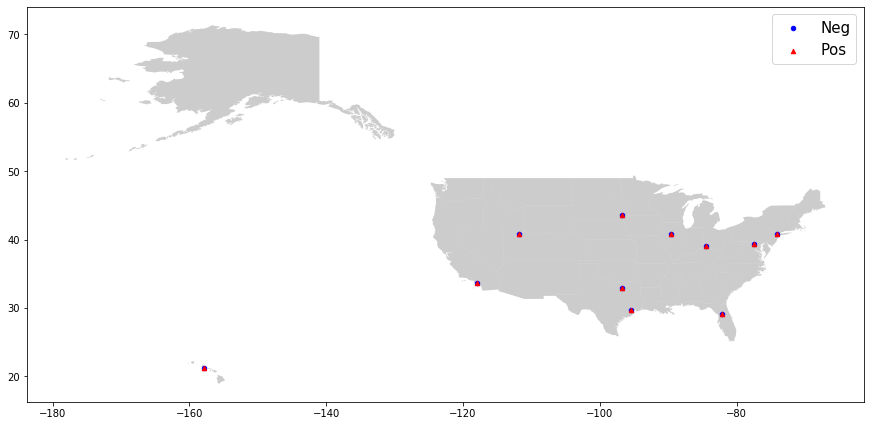

In [48]:
fig, ax = plt.subplots(figsize=(15,15))
usmap.plot(ax=ax,alpha=0.4,color="grey")
geo_df_i2.plot(ax=ax,markersize =20,color="blue",marker="o",label="Neg")
geo_df_i2.plot(ax=ax,markersize =20,color="red",marker="^",label="Pos")
plt.legend(prop={'size':15})

# Janssen Trial Locations

In [50]:
jan2 = pd.read_csv('jan_trial_locations.csv')
crs = {'init':'epsg:4236'}
jan2.head()

,Account,Zip,Lat,Long
0,"Urological Associates of Southern Arizona, P.C.",85741,32.323693,-111.015367
1,University of Southern California,90089,34.020965,-118.285443
2,Kaiser Permanente,92505,33.904883,-117.469372
3,UC Davis Comprehensive Cancer Center,95817,38.554306,-121.452527
4,University of Colorado Health Sciences Center,80045,39.745282,-104.837573


In [54]:
geometry = [Point(xy) for xy in zip(jan2["Long"],jan2["Lat"])]
geometry[:3]

In [55]:
geo_df_j2 = gpd.GeoDataFrame(jan2,crs=crs,geometry=geometry)
geo_df_j2.head()

,Account,Zip,Lat,Long,geometry
0,"Urological Associates of Southern Arizona, P.C.",85741,32.323693,-111.015367,POINT (-111.01537 32.32369)
1,University of Southern California,90089,34.020965,-118.285443,POINT (-118.28544 34.02097)
2,Kaiser Permanente,92505,33.904883,-117.469372,POINT (-117.46937 33.90488)
3,UC Davis Comprehensive Cancer Center,95817,38.554306,-121.452527,POINT (-121.45253 38.55431)
4,University of Colorado Health Sciences Center,80045,39.745282,-104.837573,POINT (-104.83757 39.74528)


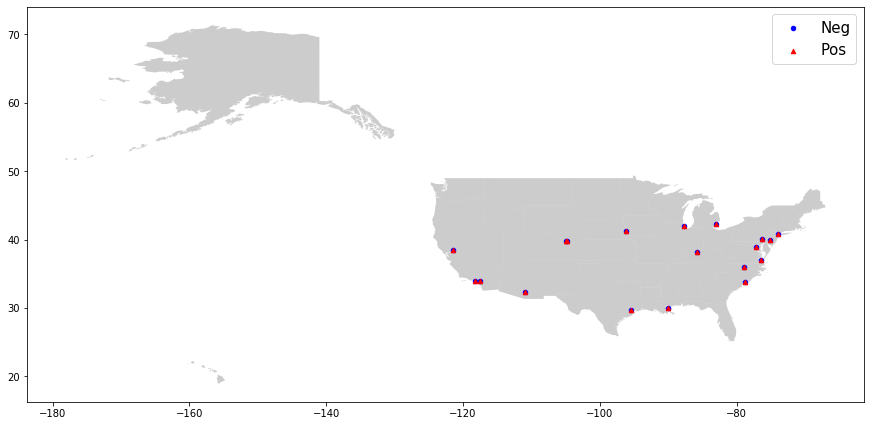

In [56]:
fig, ax = plt.subplots(figsize=(15,15))
usmap.plot(ax=ax,alpha=0.4,color="grey")
geo_df_j2.plot(ax=ax,markersize =20,color="blue",marker="o",label="Neg")
geo_df_j2.plot(ax=ax,markersize =20,color="red",marker="^",label="Pos")
plt.legend(prop={'size':15})